<Axes: xlabel='time'>

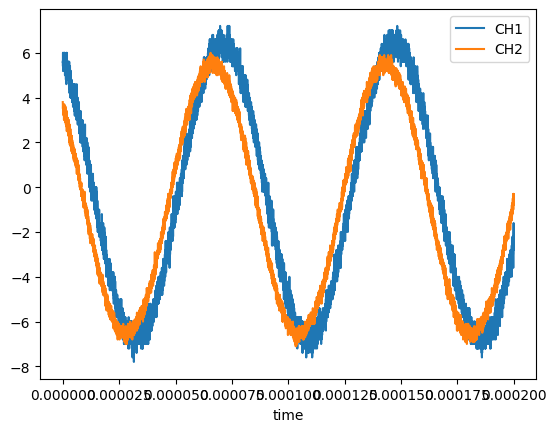

In [26]:
import pandas as pd
df= pd.read_csv("2026-01-04_14-46-11-637.csv")
df.plot(x="time", y= ["CH1", "CH2"])

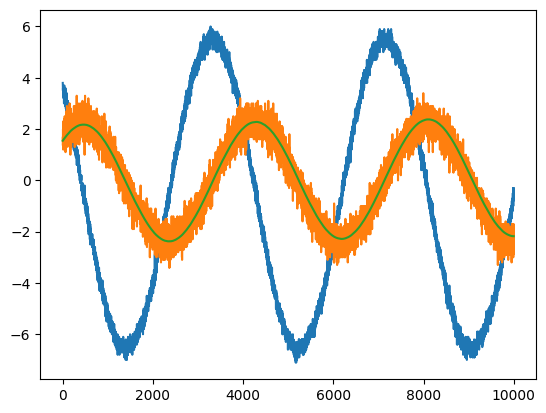

In [74]:
import matplotlib.pyplot  as plt
df= pd.read_csv("2026-01-04_14-46-11-637.csv")
t= df.time.values
vin= df.CH1.values
vr= df.CH2.values
vc = vin -vr
#i = C*dvc/dt
#vr2 = R*C*dvc/dt

# REMOVE DC COMP 
PP= vr.max()-vr.min()
vrn= vr-vr.min()
vrn=vrn/vrn.max()
vrn= vrn*PP-PP/2


PP= vc.max()-vc.min()
vcn= vc-vc.min()
vcn=vcn/vcn.max()
vcn= vcn*PP-PP/2


R=19.97e3
C=1.6e-9
vc2=Ts*vrn.cumsum()/(R*C)+vc[0]

PP= vc2.max()-vc2.min()
vc2n= vc2-vc2.min()
vc2n=vc2n/vc2n.max()
vc2n= vc2n*PP-PP/2

plt.plot(vr)
plt.plot(vcn)
plt.plot(vc2n)

In [29]:
# CR 
vin = df.CH1.values
Ts=df.Ts.iloc[0]
R=19.97e3
C = 2.0897173859208564e-9
RC = R*C
#R*i+vc=vin
#i=C*dvc/dt
#RC*dvc/dt+vc=vin
#dvc/dt = (1/RC)*(vin -vc)

def dvc_dt(vc, t, vin):
    k = int(t / Ts)
    return (vin[k] - vc) / RC

t = np.arange(len(vin)) * Ts

from scipy.integrate import odeint
vc = odeint(dvc_dt, 0.0, t, args=(vin,))[:, 0]

<Axes: xlabel='time'>

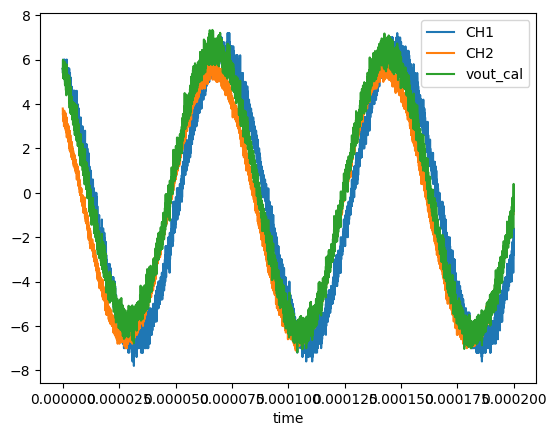

In [31]:
vout_= vin -vc
df["vout_cal"]= vout_
df.plot(x="time", y= ["CH1", "CH2", "vout_cal"])


In [1]:
import numpy as np

def C_from_phase(f, R, phase_deg):
    w = 2 * np.pi * f
    phase_rad = np.deg2rad(abs(phase_deg))
    C = 1 / (w * R * np.tan(phase_rad))
    return C


C= C_from_phase(f=13.11e3, R=19.97e3, phase_deg=16.22)
print(f"# C = {C*1e9} nF")
# C = 2.0897173859208564 nF

# C = 2.0897173859208564 nF


<img src = "Capture d’écran 2026-01-04 184039.png">

In [75]:
from math import *
S=30*38.4*2+30*19.20*2+2*pi*30**2
S=1e-6*S
print("#", S)

thik_layer = 1e-3*1.6/4
print("#",thik_layer)

ep0=8.854e-12# F.m-1 
ep=4 # FR4
C1=ep*ep0*S/thik_layer


C2=ep*ep0*S/(thik_layer*2)# 2 layers 

Ctot= C1+C2
print("# ", Ctot*1e9, "nF")


# 0.009110866776461626
# 0.0004
#  1.2100142165818684 nF

# 0.009110866776461626
# 0.0004
#  1.2100142165818684 nF
